# **Classification of Spam and Ham Messages**  

**Introduction:**  
This notebook presents a classification problem focused on distinguishing between spam and ham (non-spam) messages.  
The objective is to develop robust machine learning models capable of accurately identifying spam messages while minimizing misclassifications of legitimate messages.  

**Approach:**  
To tackle this task, we explore the build of two popular machine learning algorithms: **Random Forest and Support Vector Machine (SVM)**.  
Both models are trained and fine-tuned using hyperparameter optimization techniques to enhance their performance.

In [80]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
url='https://docs.google.com/spreadsheets/d/1XLGaJ58oL1CfBNtHcjf-eoVk4FiKOqgk3ZM3RU6-T4E/export?format=csv&gid=1903706674'

df = pd.read_csv(url)

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
len(df.message[0])

111

**Data Preprocessing**

In [5]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
df.shape

(5572, 4)

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
label,5572,2,ham,4825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
message,5572,5169,"Sorry, I'll call later",30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
length,5572.0,NaN,NaN,NaN,80.48995,59.942907,2.0,36.0,62.0,122.0,910.0
punct,5572.0,NaN,NaN,NaN,4.177495,4.623919,0.0,2.0,3.0,6.0,133.0


In [8]:
df.label.value_counts(normalize=True)*100

ham     86.593683
spam    13.406317
Name: label, dtype: float64

**Handling Imbalance:**  
As the data was Imbalance we will try to reduce the data in `ham` into `spam`

In [9]:
#Creating buuckets for both classes
ham = df[df.label == 'ham']
spam = df[df.label == 'spam']
print("ham bucket:",ham.shape,"spam bucket:",spam.shape)

ham bucket: (4825, 4) spam bucket: (747, 4)


In [10]:
ham = ham.sample(spam.shape[0])

In [11]:
print("ham bucket:",ham.shape,"spam bucket:",spam.shape)

ham bucket: (747, 4) spam bucket: (747, 4)


In [12]:
data=ham.append(spam,ignore_index=True)
data.shape

(1494, 4)

In [13]:
data.label.value_counts(normalize=True)*100

ham     50.0
spam    50.0
Name: label, dtype: float64

**Data Visualization**

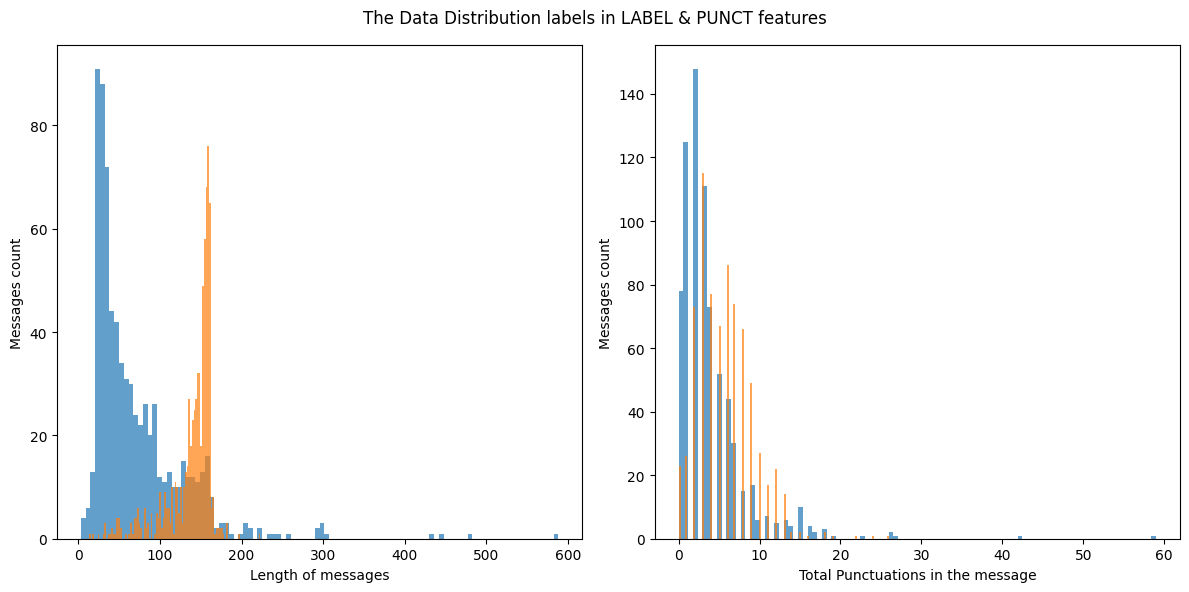

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.hist(data[data.label == 'ham'].length,bins=100,alpha=0.7)
plt.hist(data[data.label == 'spam'].length,bins=100,alpha=0.7)
plt.xlabel("Length of messages")
plt.ylabel("Messages count")

plt.subplot(1,2,2)
plt.hist(data[data.label == 'ham'].punct,bins=100,alpha=0.7)
plt.hist(data[data.label == 'spam'].punct,bins=100,alpha=0.7)
plt.xlabel("Total Punctuations in the message")
plt.ylabel("Messages count")
plt.suptitle("The Data Distribution labels in LABEL & PUNCT features")
plt.tight_layout()
plt.show()

## Model Builinding

In [15]:
X_train,X_test,y_train,y_test = train_test_split(data.message,data.label,test_size=0.3,random_state=0,shuffle=True)

In [16]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1045,) (449,) (1045,) (449,)


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [67]:
vectrizer = TfidfVectorizer()

X_train_vec=vectrizer.fit_transform(X_train)
X_test_vec=vectrizer.transform(X_test)
X_train_vec.shape,X_test_vec.shape

((1045, 3734), (449, 3734))

### Random Forest Model

In [68]:
RandomForest_classifier=RandomForestClassifier()

In [69]:
paramter_grid = {
    'max_depth':[3,5,10,None],
    'n_estimators':[10,100,200],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[1,2,3]
}

In [70]:
classifier = GridSearchCV(RandomForest_classifier,cv=5,param_grid=paramter_grid,scoring='accuracy')

In [71]:
classifier.fit(X_train_vec,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [10, 100, 200]},
             scoring='accuracy')

In [72]:
classifier.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

In [73]:
predictions=classifier.predict(X_test_vec)

In [79]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.93      1.00      0.97       227
        spam       1.00      0.93      0.96       222

    accuracy                           0.96       449
   macro avg       0.97      0.96      0.96       449
weighted avg       0.97      0.96      0.96       449



**Summary (Random Forest):**  
The classification report shows that the model achieved an overall accuracy of **96%**.  
It exhibits high precision, recall, and F1-score values for both the "ham" and "spam" classes, indicating robust performance in correctly classifying messages.  
The weighted average metrics further confirm the model's effectiveness in handling class imbalance, resulting in a reliable classification performance overall.

In [81]:
confusion_matrix(y_test,predictions)

array([[227,   0],
       [ 16, 206]])

**Random Forest - Confusion Matrix:**  
The confusion matrix reveals that the Random Forest model correctly classified all 227 "ham" messages and 206 "spam" messages.  
It misclassified 16 "spam" messages as "ham," with no misclassifications for "ham" messages.  
This demonstrates the robustness of the model in accurately identifying "ham" messages, while also exhibiting strong performance in classifying "spam" messages. Overall, the model's performance reflects a high degree of precision and recall, contributing to its impressive accuracy.

### Support Vector Machine (SVM)

In [82]:
from sklearn.svm import SVC

In [83]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [84]:
svm_grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [85]:
svm_grid.fit(X_train_vec,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.531 total time=   0.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.517 total time=   0.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.502 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.502 total time=   0.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.502 total time=   0.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.502 total time=   0.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.502 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.502 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [87]:
svm_grid.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [90]:
svm_predictions = svm_grid.predict(X_test_vec)

In [92]:
print(classification_report(y_test,svm_predictions))

              precision    recall  f1-score   support

         ham       0.96      0.94      0.95       227
        spam       0.94      0.96      0.95       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



**Summary (SVM):**  
The SVM model achieved an overall accuracy of **95%**, with precision, recall, and F1-score values of around 0.95 for both the "ham" and "spam" classes.  
This indicates that the model performs well in correctly classifying both classes, with balanced performance across precision and recall metrics.  
The weighted average metrics further confirm the model's effectiveness in handling class imbalance, resulting in a reliable classification performance overall.

In [91]:
confusion_matrix(y_test,svm_predictions)

array([[214,  13],
       [  9, 213]])

**SVM - Confusion Matrix:**  
The confusion matrix shows that the SVM model correctly classified 214 "ham" messages and 213 "spam" messages.  
It misclassified 13 "ham" messages as "spam" and 9 "spam" messages as "ham".  
Overall, the model demonstrates strong performance in correctly identifying both classes, with a relatively small number of misclassifications. This indicates a good balance between sensitivity and specificity in the model's predictions, contributing to its high overall accuracy.

### **Conclusion:**  
After performing hyper parameter tuning for both the models.  

|Estimator Name|Accuracy|
|--------------|--------|
|Random Forest - Hyperparamters tuned|**96%**|
|SVM - Hyperparamters tuned|95%|

Random Forest with hyperparameters tuned provides the best results and is able to effectively classify messages.

<b><center>END</center></b>